In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sanfran_tab = "SanFrancisco/Neutrons/ActualExp_21_tab.lis"
sanfran_sum = "SanFrancisco/Neutrons/ActualExp_21_sum.lis"
califor_tab = "Californication/Neutrons/HighStats/NCfV3_21_tab.lis"
califor_sum = "Californication/Neutrons/HighStats/NCfV3_21_sum.lis"

In [3]:
def read_tab_data(maindir):
    f =open(maindir,"r")
    num = -1
    dic = {}
    edges = []
    counts =[]
    name = 0
    for l in f:
        if l[:len(" # Detector")] == " # Detector":
            name = l.split("     ")[-2].split(" ")[-1]
            #print(name)
        if  l[:len(" # N. of energy intervals")]== " # N. of energy intervals":
            num = int(l.split("     ")[-1])
            edges = np.zeros(num)
            counts = np.zeros(num)
            num = num - 1
            continue
        if num >= 0:
            edge = float(l.strip().split()[0])
            count = float(l.strip().split()[-2])
            edges[num] = np.array(edge)
            counts[num] = np.array(count)
            num -=1
        if num == 0:
            dic[name] = [edges, counts]
    return dic

In [4]:
def read_sum(file):
    f =open(file,"r")
    sum_dic = {}
    for l in f:
        if l.find('Detector')!= -1:
            name = l.split()[-1]
        if l.find('Volume')!= -1:
            volume =  float(l.split()[1])
        if l.find('reg')!= -1:
            region = float(l.split()[-2])
        if l.find('Tot. response (p/cmq/pr)') != -1:
            fluence = float(l.split()[-4])
            fluence_error = float(l.split()[-2])
            sum_dic[name] = np.array([volume,region,fluence,fluence_error])
    return sum_dic

In [5]:
sum_dic = read_sum(sanfran_sum)
for j in sum_dic.keys():
    if j == "SP5n":
        sum_dic[j] = sum_dic[j]*np.array([1/0.125,1,0.125,1])
    if j[-1] == "n":
        print(j, sum_dic[j][-2])

SP1n 0.00022658666
SP2n 0.00024368697
SP4n 6.8859306e-05
SP5n 6.797343625e-05
QZ1n 0.00022701427
QZ2n 0.00024189262
QZ3n 0.00025816099
QZ4n 0.00024200459
QZ5n 6.7845212e-05
QZ6n 6.7675333e-05
BaF1n 0.00019358273
BaF2n 0.00020485302
BaF3n 0.00021593642
BaF4n 6.1268816e-05
BaF5n 6.0928724e-05
CaF1n 0.00017174637
CaF2n 0.00018400791
CaF3n 0.00020060329
CaF4n 5.3518215e-05
CaF5n 5.3644588e-05


/home/gonzalo/sw/anaconda3/envs/CC/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  if sys.path[0] == '':
/home/gonzalo/sw/anaconda3/envs/CC/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


SP1n 0.0002186310073163279
SP2n 0.00023481718100490593
SP4n 6.632892417209902e-05
SP5n 6.563467680700739e-05
QZ1n 0.00022030594201464238
QZ2n 0.000233401929306977
QZ3n 0.0002498143547302511
QZ4n 0.00023335649683814297
QZ5n 6.517556202914843e-05
QZ6n 6.507107372750328e-05
BaF1n 0.00018764840881886852
BaF2n 0.00019800542131188405
BaF3n 0.00020810624094394102
BaF4n 5.945091951467981e-05
BaF5n 5.8847509693244426e-05
CaF1n 0.00016658061971271443
CaF2n 0.00017741616356868552
CaF3n 0.00019316216666792488
CaF4n 5.1884325864088785e-05
CaF5n 5.158767749466425e-05


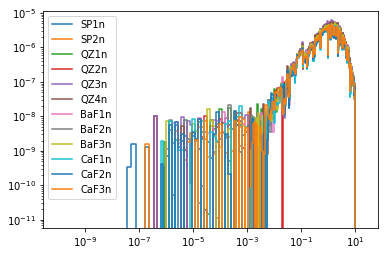

In [14]:
dic = read_tab_data(sanfran_tab)
j=1
for i in dic.keys():
    x= (dic[i][0][1:] + dic[i][0][:-1])/2
    dx = (dic[i][0][:-1] - dic[i][0][1:])
    y = dic[i][1][:-1]
    if i == "SP5n":
        y = y*0.125
    if i[-1] == "n":
        if  sum(y*dx) > 0.0001:
            plt.figure(1)
            plt.plot(x*1000,y*dx,ls='steps',label = i)
            plt.yscale("log")
            plt.xscale("log")
            print(i,sum(y*dx))
            j=j+1
            plt.legend()
        else:
            plt.figure(2)
            plt.plot(x*1000,y*dx,ls='steps',label = i)
            plt.yscale("log")
            plt.xscale("log")
            print(i,sum(y*dx))
            j=j+1
            plt.legend()


In [7]:
cali = read_tab_data(califor_tab)

/home/gonzalo/sw/anaconda3/envs/CC/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  # Remove the CWD from sys.path while we load stuff.


C1 0.0002815273687240231
C2 0.0002958163887233431
C3 0.00029435143945663725
C4 0.0002773917190182879
C5 0.00024153171370329177
C6 0.00023898638819512357
C7 0.00023490542620226127
C8 0.0002353021145887555
C9 0.00023153865199818617
C10 0.0002402033919819759
C11 0.0002243858505333583
C12 0.00021905164960975344
C13 0.00020854727698545064
C14 0.0002066880521835838
C15 0.0002039151907087831
C16 0.0002067775391426867
C17 0.00021470109467309806
C18 0.00022672773221347022
C19 0.0001968087443528524
C20 0.000193060242512278
C21 0.00018248433271286289
C22 0.0001820786446324025
C23 0.00018277085019321817
C24 0.00018478661161687606
C25 0.00019301833229363192
C26 0.00020117818900343477
C27 0.0001768080497885753
C28 0.00016534709145742848
C29 0.00016630586391115531
C30 0.00016696196175995258
C31 0.0001676920508574109
C32 0.00017504496063935763
C33 0.00016198319844259125
C34 0.00015334846742707324
C35 0.00015128308312143247
C36 0.00015353037260257382
C37 0.00014961485729241063
C38 0.0001627743282884608

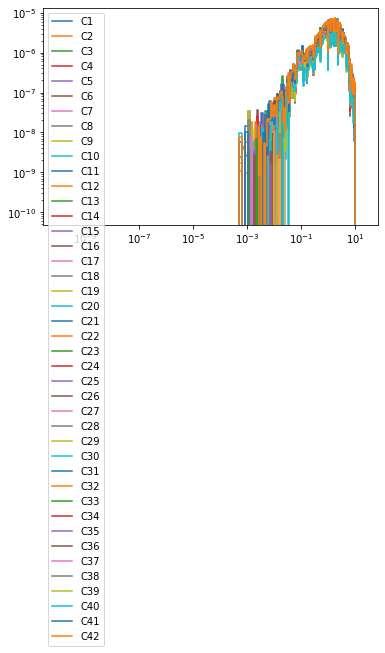

In [8]:
j=1
for i in cali.keys():
    x= (cali[i][0][1:] + cali[i][0][:-1])/2
    dx = (cali[i][0][:-1] - cali[i][0][1:])
    y = cali[i][1][:-1]
    if i == "C2":
        y = y*0.125
    if i == "C3":
        y = y*0.125
    plt.plot(x*1000,y*dx,ls='steps',label = i)
    plt.yscale("log")
    plt.xscale("log")
    print(i,sum(y*dx))
    j=j+1
    plt.xlabel("")
    plt.legend()

In [9]:
(284/64.4)*(0.002/0.003)

2.9399585921325047

In [10]:
((284)/64.3)

4.416796267496112

In [11]:
0.002354811515653098*0.125

0.00029435143945663725